# **Quantify snow losses using pvlib’s Marion and Townsend models**

In this example, we will show how to quantify **snow-related energy losses** for a solar plant using the **PVRADAR SDK**.

We will:
1. Create a site and define its design
2. Run a snow loss model
3. Visualize inputs and snow losses
4. Compare energy yield with and without snow

The example uses **pvlib’s Marion and Townsend models**, both of which are available via convenient wrappers in the PVRADAR SDK.

In [1]:
from pvradar.sdk import PvradarSite, R, resource_plot, for_resource, make_fixed_design

## Set up the location and plant design

In [2]:
location = 59.922, 17.578  # Uppsala, Sweden
site = PvradarSite(location=location, interval='2019-06-01..2021-05-31')

In this example we assume a fixed-tilt design but you can also choose to define a HSAT tracker based design.

In [3]:
site.design = make_fixed_design(tilt=20, clearance=0.8)

## Run the snow model

The PVRADAR SDK provides wrappers around common snow models from pvlib.

We will start with the **Marion model**, but you can also try the **Townsend model** by switching one line. You can also create your own snow model (or any other type of model) completely from scratch.

In [4]:
# Import wrappers aroung pvlib models
from pvradar.sdk.pv.irradiance.losses.snow import pvlib_snow_loss_marion, pvlib_snow_loss_townsend

# Select the snow model
my_snow_model = pvlib_snow_loss_marion
# my_snow_model = pvlib_snow_loss_townsend  # Uncomment to try Townsend model

Optional: define the source of snowfall data for any modeling. You can also integrate your own snowfall measurement.

In [5]:
# set preferred snowfall and air temperature datasource
site.hooks(for_resource(R.snowfall).prefer_datasource('era5'));

In [6]:
# Run the model
snow_loss_factor = site.run(my_snow_model)         # Try using townsend model instead!

To see the entire model chain that was executed, along with all models and design parameters used, we can display it as a flowchart.

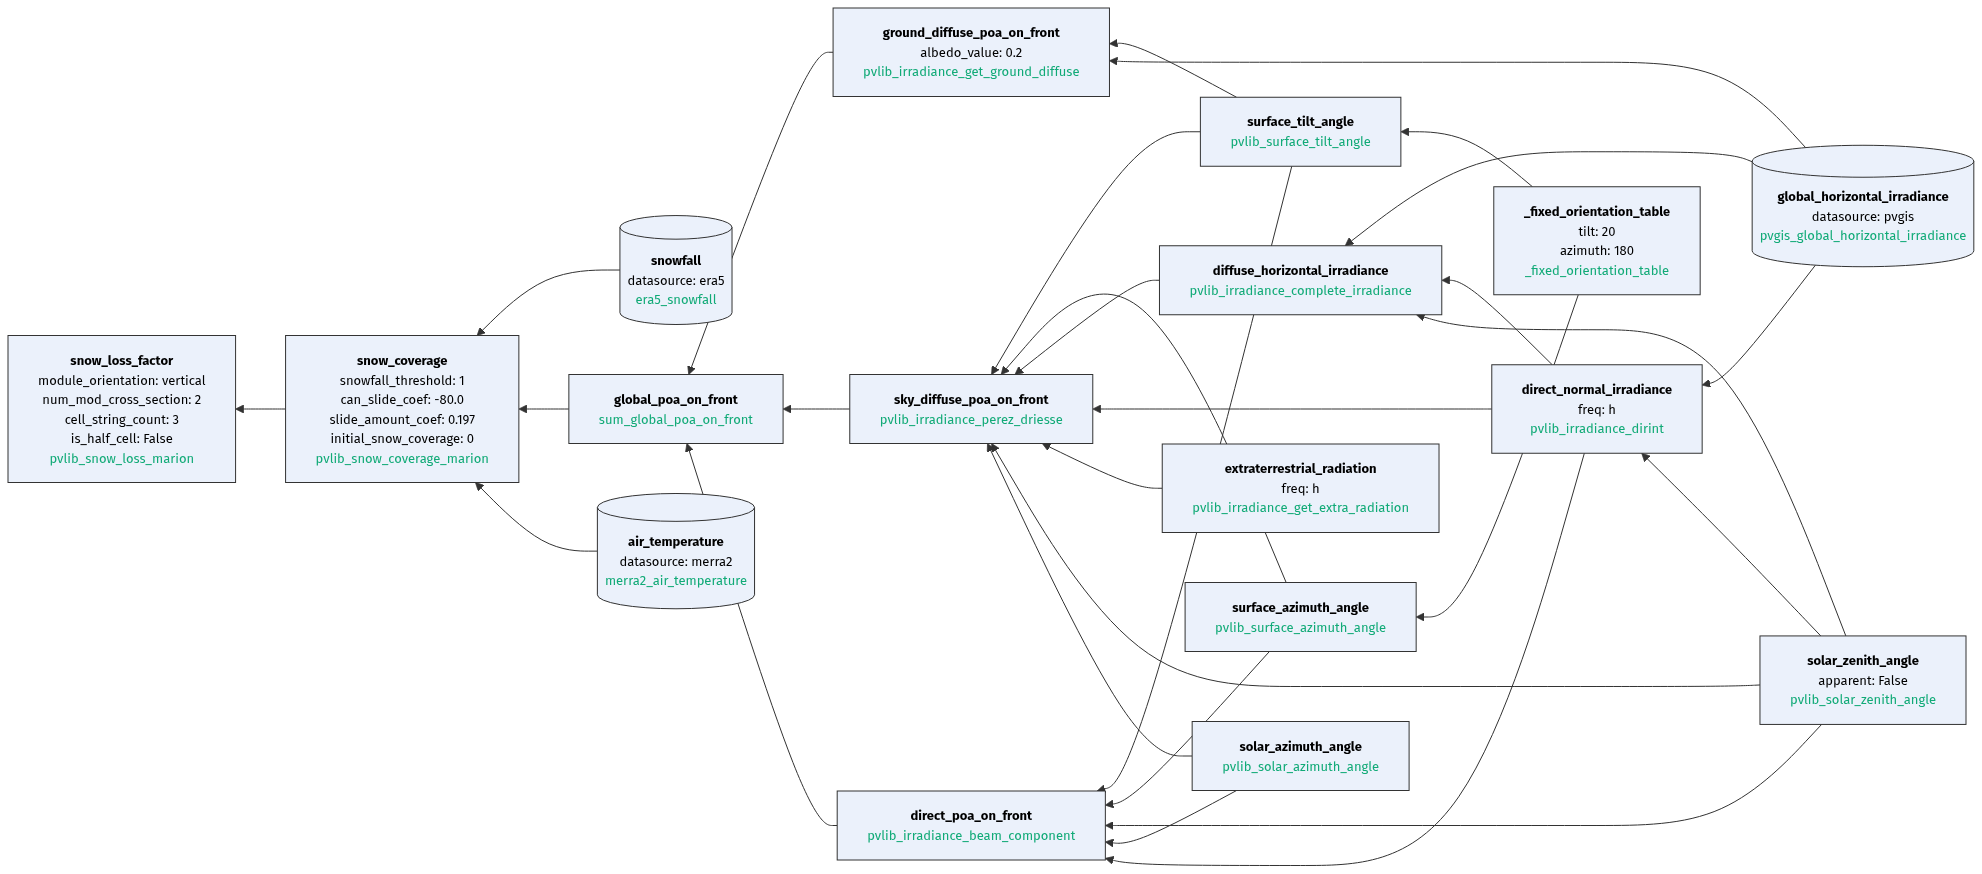

In [7]:
site.profile(my_snow_model).display_flowchart()

## Plot snow loss factor and most important inputs

Get access to dozens of resource types in a single line of code and using our R-Notation to specify the desired unit, frequency and datasource. Check our [Resource DB](https://pvradar.notion.site/1d157af8487c80d68be3ce9473e9bbba?v=1d157af8487c81759b9f000cecd9245f) for a complete list. 

In [8]:
snowfall = site.resource(R.snowfall(to_unit='cm', to_freq='D'))
air_temp = site.resource(R.air_temperature)
poa = site.resource(R.global_poa_on_front)

In [9]:
resource_plot(snow_loss_factor, snowfall, poa)

## Compare energy yield with and without snow

In [10]:
# Energy without snow losses
energy_without_snow = site.resource(R.grid_energy(to_unit='MWh', to_freq='D'), label='without snow')

# Energy with snow losses
with site.hooks(for_resource(R.snow_loss_factor).use_model(my_snow_model)):
    energy_with_snow = site.resource(R.grid_energy(to_unit='MWh', to_freq='D'), label='with snow')

# Plot both
resource_plot(energy_without_snow, energy_with_snow)

## Summary: How much energy is lost to snow?

In [11]:
# Average snow loss factor (as %)
print(f'The average snow loss factor is: {snow_loss_factor.mean()*100:.2f}%')

# Actual share of energy lost (as %)
snow_energy_loss_fraction = (energy_without_snow.sum() - energy_with_snow.sum()) / energy_without_snow.sum()
print(f'The share of energy actually lost is: {snow_energy_loss_fraction*100:.2f}%')

The average snow loss factor is: 3.11%
The share of energy actually lost is: 0.49%


# 

# **Conclusion: Why use PVRADAR for snow loss modeling?**

With just a few lines of code, you built a fully functional snow loss model, validated it with real-world data, and quantified its impact on energy yield.

But this is just the beginning.

## Model and optimize the real-world behavior of your PV plants

PVRADAR allows you to model the effect of **any technical or environmental factor** on plant performance — not just snow:
- Combine snow, soiling, albedo, clipping, battery storage, and more in a single modeling workflow.
- Quantify impacts in terms of energy yield, PR, LCOE, and financial KPIs.
- Explore what-if scenarios and optimize plant design and O&M strategies.

## Build internal tools and advanced applications

With PVRADAR, you can turn your models into robust, organization-wide tools:
- Build internal web apps that allow colleagues to apply validated models without writing code.
- Standardize modeling across teams and projects.
- Automate reporting and performance analysis to save time and ensure consistency.

## One Python line away from your data

The PVRADAR SDK simplifies data access:
- Seamlessly connect to satellite data, meteo stations, and internal performance databases.
- Standardize and pre-process data for modeling — ready to use in one line of Python.
- Keep full control over your data, whether in the cloud or on-premises.

## Supported by deep expertise

PVRADAR is more than software — it is backed by industry-leading expertise:
- Model validation and tuning with high-quality reference data.
- Consulting and support on snow losses, soiling, O&M optimization, and yield forecasting.
- Proven track record with leading IPPs, developers, and consultants.

👉 **Ready to go further?** [**Contact us to learn how we can help solve your modeling challenge!**](https://pvradar.com/contact)
